In [78]:
import sqlite3 as sql
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import pyarrow as pa
import pyarrow.parquet as pq

In [193]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [194]:
root = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/"
original_22012 = root + "sqlite_pulses/Snowstorm/22012/"
PMTfied_22012 = root + "PMTfied/Snowstorm/22012/"
PMTfied_22015 = root + "PMTfied/Snowstorm/22015/"
PMTfied_22018 = root + "PMTfied/Snowstorm/22018/"

In [195]:
print(os.listdir(original_22012))
print(os.listdir(PMTfied_22012))
print(os.listdir(PMTfied_22015))
print(os.listdir(PMTfied_22018))

['merged_part_14.db', 'merged_part_15.db', 'merged_part_17.db', 'merged_part_16.db', 'merged_part_12.db', 'merged_part_8.db', 'merged_part_9.db', 'merged_part_13.db', 'merged_part_11.db', 'merged_part_10.db', 'merged_part_3.db', 'merged_part_21.db', 'merged_part_19.db', 'merged_part_18.db', 'merged_part_2.db', 'merged_part_20.db', 'merged_part_22.db', 'merged_part_23.db', 'merged_part_1.db', 'merged_part_27.db', 'merged_part_5.db', 'merged_part_26.db', 'merged_part_4.db', 'merged_part_6.db', 'merged_part_24.db', 'merged_part_7.db', 'merged_part_25.db']
['truth_8.parquet', 'truth_27.parquet', 'truth_4.parquet', 'truth_23.parquet', '23', '4', '11', '16', '3', '9', '24', 'truth_15.parquet', 'truth_11.parquet', 'truth_19.parquet', 'truth_18.parquet', '20', 'truth_14.parquet', 'truth_10.parquet', '18', '12', '7', '15', 'truth_26.parquet', 'truth_1.parquet', 'truth_5.parquet', 'truth_22.parquet', '27', 'truth_9.parquet', '17', '8', '2', '25', 'truth_16.parquet', 'truth_12.parquet', 'truth_24

In [196]:
def convertDBtoDF(file:str, table:str, N_events:int = None) -> pd.DataFrame:
    con = sql.connect(file)
    event_no_query = f'SELECT DISTINCT event_no FROM {table} LIMIT {N_events}'
    event_nos = pd.read_sql_query(event_no_query, con)['event_no'].tolist()
    
    event_filter = ','.join(map(str, event_nos))
    query = f'SELECT * FROM {table} WHERE event_no IN ({event_filter})'
    
    df = pd.read_sql_query(query, con)
    con.close()
    
    return df

def convertParquetToDF(file:str) -> pd.DataFrame:
    table = pq.read_table(file)
    df = table.to_pandas()
    return df

In [197]:
PMTfied_22012_1 = PMTfied_22012 + "1/"
df_pmt_22012_1_1 = convertParquetToDF(PMTfied_22012_1 + "PMTfied_1.parquet")
df_pmt_22012_1_truth = convertParquetToDF(PMTfied_22012 + "truth_2.parquet")

In [198]:
df_pmt_22012_1_1.columns

Index(['event_no', 'original_event_no', 'dom_x', 'dom_y', 'dom_z', 'dom_x_rel',
       'dom_y_rel', 'dom_z_rel', 'pmt_area', 'rde', 'saturation_status', 'q1',
       'q2', 'q3', 'q4', 'q5', 'Q25', 'Q75', 'Qtotal', 'hlc1', 'hlc2', 'hlc3',
       'hlc4', 'hlc5', 't1', 't2', 't3', 't4', 't5', 'T10', 'T50', 'sigmaT'],
      dtype='object')

In [199]:
df_pmt_22012_1_truth

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid
0,112000200029386,29386,12,2,1,101,101,1.637639e+07,0.236195,0.818763,14.0
1,112000200029387,29387,12,2,1,105,206,8.163622e+06,1.237687,2.058201,-14.0
2,112000200029388,29388,12,2,1,199,405,2.026390e+07,4.270128,1.481375,-14.0
3,112000200029389,29389,12,2,1,23,428,2.990415e+07,5.063048,2.077678,14.0
4,112000200029390,29390,12,2,1,59,487,2.879856e+07,5.255886,0.640930,-14.0
...,...,...,...,...,...,...,...,...,...,...,...
29423,112000200058809,58809,12,2,15,1015,495616,4.057609e+07,5.461870,1.307896,-14.0
29424,112000200058810,58810,12,2,15,1588,497204,2.973177e+07,1.520318,0.804982,14.0
29425,112000200058811,58811,12,2,15,284,497488,9.188149e+07,4.678607,0.398277,14.0
29426,112000200058812,58812,12,2,15,21,497509,6.991261e+07,4.487237,1.566016,-14.0


In [200]:
df_pmt_22012_1_1['rde'].value_counts()

rde
1.00    603714
1.35     91689
Name: count, dtype: int64

In [201]:
df_pmt_22012_1_1['event_no'].nunique()

2000

In [202]:
df_pmt_22012_1_truth['event_no'].nunique()

29428

In [203]:
def advanced_process(df_initial: pd.DataFrame) -> pd.DataFrame:
    df = df_initial.copy()
    
    df[['dom_x', 'dom_y', 'dom_z']] /= 500
    df[['dom_x_rel', 'dom_y_rel', 'dom_z_rel']] /= 500
    
    t_scaler = 1e-3
    t_shifter = 10_000
    for col in ['t1', 't2', 't3']:
        df.loc[df[col] != -1, col] = (df[col] - t_shifter) * t_scaler
    
    for col in ['q1', 'q2', 'q3']:
        df.loc[df[col] != -1, col] = np.log10(df[col])
    
    Q_shifter = 2
    for col in ['Q25', 'Q75', 'Qtotal']:
        df.loc[df[col] != -1, col] = np.log10(df[col]) - Q_shifter
    
    for col in ['T10', 'T50', 'sigmaT']:
        df.loc[df[col] != -1, col] *= t_scaler
    return df

In [204]:
def plot_histogram(data1, bins, xlabel, ylabel, title, 
                   log_scale=False, 
                   data2=None, data3=None, 
                   label1=None,
                   label2=None, 
                   label3=None):
    fig, ax = plt.subplots(figsize=(11, 7))
    ax.hist(data1, bins=bins, histtype='step', linewidth=2, label=label1)
    
    if data2 is not None:
        ax.hist(data2, bins=bins, histtype='step', linewidth=2, label=label2, hatch='//')
    
    if data3 is not None:
        ax.hist(data3, bins=bins, histtype='step', linewidth=2, label=label3, hatch='\\')
    
    if log_scale:
        ax.set_yscale("log")
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    if data2 is not None or data3 is not None:
        ax.legend()
    
    return fig, ax


In [205]:
def plot_Q(df: pd.DataFrame, bin_width=100):
    Q25 = df["Q25"]
    Q75 = df["Q75"]
    Qtotal = df["Qtotal"]

    bins = np.arange(Qtotal.min(), Qtotal.max() + bin_width, bin_width)
    fig, ax = plot_histogram(
        data1 = Qtotal, bins = bins, 
        xlabel="Q", ylabel="Counts", 
        title="Accumulated charge distribution",
        data2=Q25, 
        data3=Q75,
        label1="Qtotal",
        label2="Q25",
        label3="Q75",
        log_scale=True
    )
    d_25 = {
        "Q_25": "",
        "min": f"{Q25.min():.2f}",
        "max": f"{Q25.max():.2f}",
        "mean": f"{Q25.mean():.2f}",
        "std": f"{Q25.std():.2f}",
        "bin_width": f"{bin_width}",
    }
    d_75 = {
        "Q_75": "",
        "min": f"{Q75.min():.2f}",
        "max": f"{Q75.max():.2f}",
        "mean": f"{Q75.mean():.2f}",
        "std": f"{Q75.std():.2f}",
        "bin_width": f"{bin_width}",
    }
    d_total = {
        "Q_total": "",
        "min": f"{Qtotal.min():.2f}",
        "max": f"{Qtotal.max():.2f}",
        "mean": f"{Qtotal.mean():.2f}",
        "std": f"{Qtotal.std():.2f}",
        "bin_width": f"{bin_width}",
    }
    add_text_to_ax(0.10, 0.95, nice_string_output(d_25), ax, fontsize=12)
    add_text_to_ax(0.40, 0.95, nice_string_output(d_75), ax, fontsize=12)
    add_text_to_ax(0.70, 0.95, nice_string_output(d_total), ax, fontsize=12)
    
    return fig, ax

In [206]:
# plot_Q(df_pmt_22015_5_7)

In [207]:
def plot_dom_position(df: pd.DataFrame, axis: str, bin_width = 50):
    if axis not in ["x", "y", "z"]:
        raise ValueError("Axis must be one of 'x', 'y', or 'z'.")
    
    dom_col = f"dom_{axis}"
    rel_dom_col = f"dom_{axis}_rel"
    
    dom_values = df[dom_col]
    rel_dom_values = df[rel_dom_col]
    
    bins = np.arange(dom_values.min(), dom_values.max() + bin_width, bin_width)
    
    fig, ax = plot_histogram(
        data1=dom_values,
        bins=bins,
        xlabel=f"DOM {axis}",
        ylabel="Counts",
        title=f"DOM {axis} distribution",
        data2=rel_dom_values,
        label1=f"DOM {axis} position",
        label2=f"DOM {axis} relative position",
        log_scale=False,
    )
    
    stats_dom = {
        f"DOM {axis}": "",
        "min": f"{dom_values.min():.2f}",
        "max": f"{dom_values.max():.2f}",
        "mean": f"{dom_values.mean():.2f}",
        "std": f"{dom_values.std():.2f}",
        "bin_width": f"{bin_width}",
    }
    stats_rel_dom = {
        f"DOM {axis} rel": "",
        "min": f"{rel_dom_values.min():.2f}",
        "max": f"{rel_dom_values.max():.2f}",
        "mean": f"{rel_dom_values.mean():.2f}",
        "std": f"{rel_dom_values.std():.2f}",
        "bin_width": f"{bin_width}",
    }
    
    add_text_to_ax(0.075, 0.95, nice_string_output(stats_dom), ax, fontsize=12)
    add_text_to_ax(0.70, 0.95, nice_string_output(stats_rel_dom), ax, fontsize=12)
    
    return fig, ax


In [208]:
# plot_dom_position(df_pmt_22015_5_7, "x")
# plot_dom_position(df_pmt_22015_5_7, "y")
# plot_dom_position(df_pmt_22015_5_7, "z")


In [209]:
def _plot_histogram(*data, bins, xlabel, ylabel, title, log_scale_x = False, log_scale_y=False, **labels):
    fig, ax = plt.subplots(figsize=(11, 7))
    
    for i, dataset in enumerate(data, start=1):
        label = labels.get(f"label{i}", f"Data {i}")  # Default label if not provided
        if i % 5 == 1:
            hatch = ''
        elif i % 5 == 2:
            hatch = '//'
        elif i % 5 == 3:
            hatch = ''
        elif i % 5 == 4:
            hatch = '\\'
        else:
            hatch = ''
        ax.hist(dataset, bins=bins, histtype='step', linewidth=2, label=label, hatch=hatch)
    
    if log_scale_y:
        ax.set_yscale("log")
    if log_scale_x:
        ax.set_xscale("log")
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    if len(data) > 1:
        ax.legend()
    
    return fig, ax

In [210]:
def _plot_q(df: pd.DataFrame, bin_width=5):
    q_columns = [col for col in df.columns if col.startswith('q') and col[1:].isdigit()]
    q_data = {col: df[col] for col in q_columns}
    
    first_q = q_columns[0]
    bins = np.arange(q_data[first_q].min(), q_data[first_q].max() + bin_width, bin_width)
    # min_val = q_data[first_q].min()
    # max_val = q_data[first_q].max()

    # num_bins = int(np.log10(max_val / min_val) / bin_width)
    # bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins + 1)
    
    data_args = {}
    for i, col in enumerate(q_columns):
        data_args[f"data{i + 1}"] = q_data[col]
        data_args[f"label{i + 1}"] = col
    
    fig, ax = _plot_histogram(
        *q_data.values(),
        bins=bins,
        xlabel="Q",
        ylabel="Counts",
        title=f"Distribution of first {len(q_columns)} charges",
        log_scale_y=True,
        log_scale_x=False,
        **data_args
    )
    
    for i, col in enumerate(q_columns):
        stats = {
            col : "",
            "min": f"{q_data[col].min():.2f}",
            "max": f"{q_data[col].max():.2f}",
            "mean": f"{q_data[col].mean():.2f}",
            "std": f"{q_data[col].std():.2f}",
            "bin_width": f"{bin_width}",
        }
        x_pos = 0.01 + i * 0.2
        add_text_to_ax(x_pos, 0.95, nice_string_output(stats), ax, fontsize=8)
    
    return fig, ax

(<Figure size 1100x700 with 1 Axes>,
 <Axes: title={'center': 'Distribution of first 5 charges'}, xlabel='Q', ylabel='Counts'>)

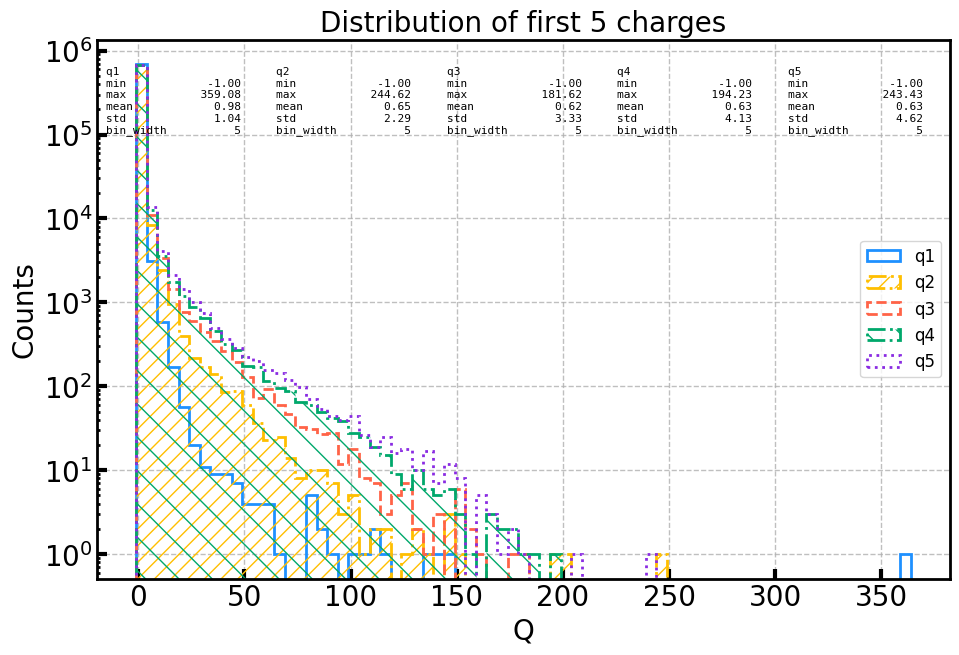

In [211]:
_plot_q(df_pmt_22012_1_1)

In [212]:
def plot_q(df: pd.DataFrame, bin_width = 5):
    q1 = df["q1"]
    q2 = df["q2"]
    q3 = df["q3"]
    
    bins = np.arange(q1.min(), q1.max() + bin_width, bin_width)
    
    fig, ax = plot_histogram(
        data1=q1, bins=bins, 
        xlabel="Q", ylabel="Counts", 
        title="First three charges distribution",
        data2=q2, 
        data3=q3,
        label1="q1",
        label2="q2",
        label3="q3",
        log_scale=True
    )
    
    d_1 = {
        "q_1": "",
        "min": f"{q1.min():.2f}",
        "max": f"{q1.max():.2f}",
        "mean": f"{q1.mean():.2f}",
        "std": f"{q1.std():.2f}",
        "bin_width": f"{bin_width}",
    }
    d_2 = {
        "q_2": "",
        "min": f"{q2.min():.2f}",
        "max": f"{q2.max():.2f}",
        "mean": f"{q2.mean():.2f}",
        "std": f"{q2.std():.2f}",
        "bin_width": f"{bin_width}",
    }
    d_3 = {
        "q_3": "",
        "min": f"{q3.min():.2f}",
        "max": f"{q3.max():.2f}",
        "mean": f"{q3.mean():.2f}",
        "std": f"{q3.std():.2f}",
        "bin_width": f"{bin_width}",
    }
    
    add_text_to_ax(0.10, 0.95, nice_string_output(d_1), ax, fontsize=12)
    add_text_to_ax(0.40, 0.95, nice_string_output(d_2), ax, fontsize=12)
    add_text_to_ax(0.70, 0.95, nice_string_output(d_3), ax, fontsize=12)
    
    return fig, ax

In [ ]:
plot_q(df_pmt_22015_5_7)

NameError: name 'df_pmt_22015_5_7' is not defined

In [ ]:
def plot_t(df: pd.DataFrame, bin_width = 100):
    t1 = df["t1"]
    t2 = df["t2"]
    t3 = df["t3"]
    
    bins = np.arange(t1.min(), t1.max() + bin_width, bin_width)
    
    fig, ax = plot_histogram(
        data1=t1, bins=bins, 
        xlabel="t", ylabel="Counts", 
        title="First three time distribution",
        data2=t2, 
        data3=t3,
        label1="t1",
        label2="t2",
        label3="t3",
        log_scale=True
    )
    
    d_1 = {
        "t_1": "",
        "min": f"{t1.min():.1f}",
        "max": f"{t1.max():.1f}",
        "mean": f"{t1.mean():.1f}",
        "std": f"{t1.std():.1f}",
        "bin_width": f"{bin_width}",
    }
    d_2 = {
        "t_2": "",
        "min": f"{t2.min():.1f}",
        "max": f"{t2.max():.1f}",
        "mean": f"{t2.mean():.1f}",
        "std": f"{t2.std():.1f}",
        "bin_width": f"{bin_width}",
    }
    d_3 = {
        "t_3": "",
        "min": f"{t3.min():.1f}",
        "max": f"{t3.max():.1f}",
        "mean": f"{t3.mean():.1f}",
        "std": f"{t3.std():.1f}",
        "bin_width": f"{bin_width}",
    }
    
    add_text_to_ax(0.10, 0.95, nice_string_output(d_1), ax, fontsize=12)
    add_text_to_ax(0.40, 0.95, nice_string_output(d_2), ax, fontsize=12)
    add_text_to_ax(0.70, 0.95, nice_string_output(d_3), ax, fontsize=12)
    
    return fig, ax

In [ ]:
# plot_t(df_pmt_22015_5_7)

'event_no', 'original_event_no', 'dom_x', 'dom_y', 'dom_z', 'dom_x_rel',
       'dom_y_rel', 'dom_z_rel', 'pmt_area', 'rde', 'saturation_status', 'q1',
       'q2', 'q3', 'Q25', 'Q75', 'Qtotal', 'hlc1', 'hlc2', 'hlc3', 't1', 't2',
       't3', 'T10', 'T50', 'sigmaT'],
      dtype='object'

In [ ]:
def plot_T(df: pd.DataFrame, bin_width = 100):
    T10 = df["T10"]
    T50 = df["T50"]

    bins = np.arange(T10.min(), T10.max() + bin_width, bin_width)
    
    fig, ax = plot_histogram(
        data1=T10, bins=bins, 
        xlabel="T", ylabel="Counts", 
        title="T10 and T50 distribution",
        data2=T50, 
        label1="T10",
        label2="T50",
        log_scale=True
    )
    
    d_10 = {
        "T_10": "",
        "min": f"{T10.min():.1f}",
        "max": f"{T10.max():.1f}",
        "mean": f"{T10.mean():.1f}",
        "std": f"{T10.std():.1f}",
        "bin_width": f"{bin_width}",
    }
    
    d_50 = {
        "T_50": "",
        "min": f"{T50.min():.1f}",
        "max": f"{T50.max():.1f}",
        "mean": f"{T50.mean():.1f}",
        "std": f"{T50.std():.1f}",
        "bin_width": f"{bin_width}",
    }
    
    add_text_to_ax(0.25, 0.95, nice_string_output(d_10), ax, fontsize=12)
    add_text_to_ax(0.65, 0.95, nice_string_output(d_50), ax, fontsize=12)
    
    return fig, ax
    

In [ ]:
# plot_T(df_pmt_22015_5_7)

In [ ]:
def plot_sigma_T(df:pd.DataFrame, bin_width = 100):
    sigma_T = df["sigmaT"]
    bins = np.arange(sigma_T.min(), sigma_T.max() + bin_width, bin_width)
    
    fig, ax = plot_histogram(
        data1=sigma_T, bins=bins, 
        xlabel="sigma_T", ylabel="Counts", 
        title="sigma_T distribution",
        log_scale=True
    )
    
    d_sigma_T = {
        "sigma_T": "",
        "min": f"{sigma_T.min():.1f}",
        "max": f"{sigma_T.max():.1f}",
        "mean": f"{sigma_T.mean():.1f}",
        "std": f"{sigma_T.std():.1f}",
        "bin_width": f"{bin_width}",
    }
    
    add_text_to_ax(0.10, 0.95, nice_string_output(d_sigma_T), ax, fontsize=12)
    
    return fig, ax


In [ ]:
# plot_sigma_T(df_pmt_22015_5_7)

In [ ]:
df_pmt_22015_5_7_adv = advanced_process(df_pmt_22015_5_7)

NameError: name 'df_pmt_22015_5_7' is not defined

(<Figure size 1100x700 with 1 Axes>,
 <Axes: title={'center': 'sigma_T distribution'}, xlabel='sigma_T', ylabel='Counts'>)

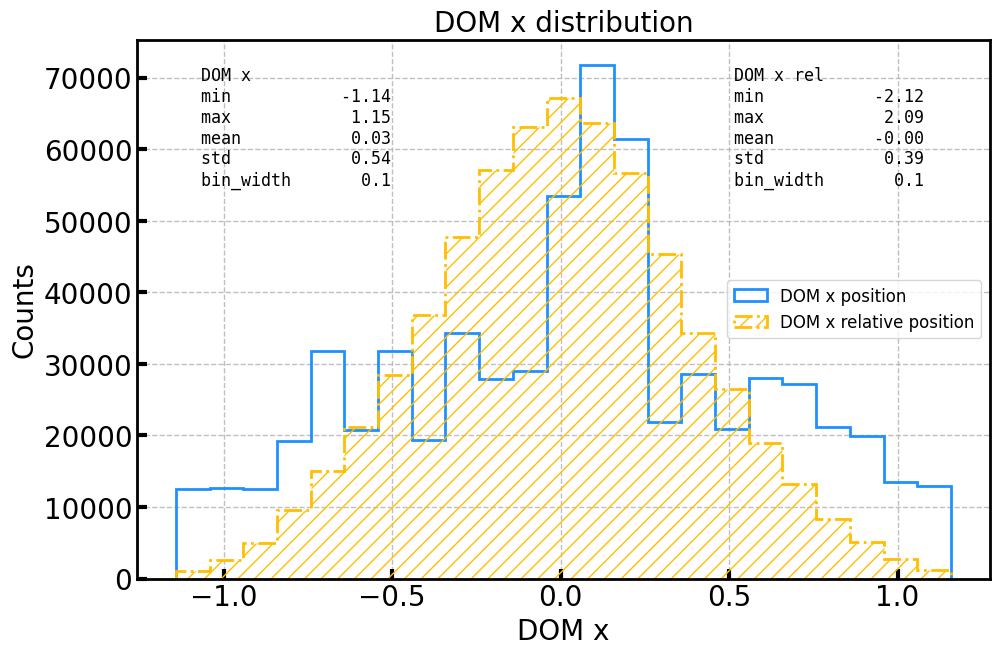

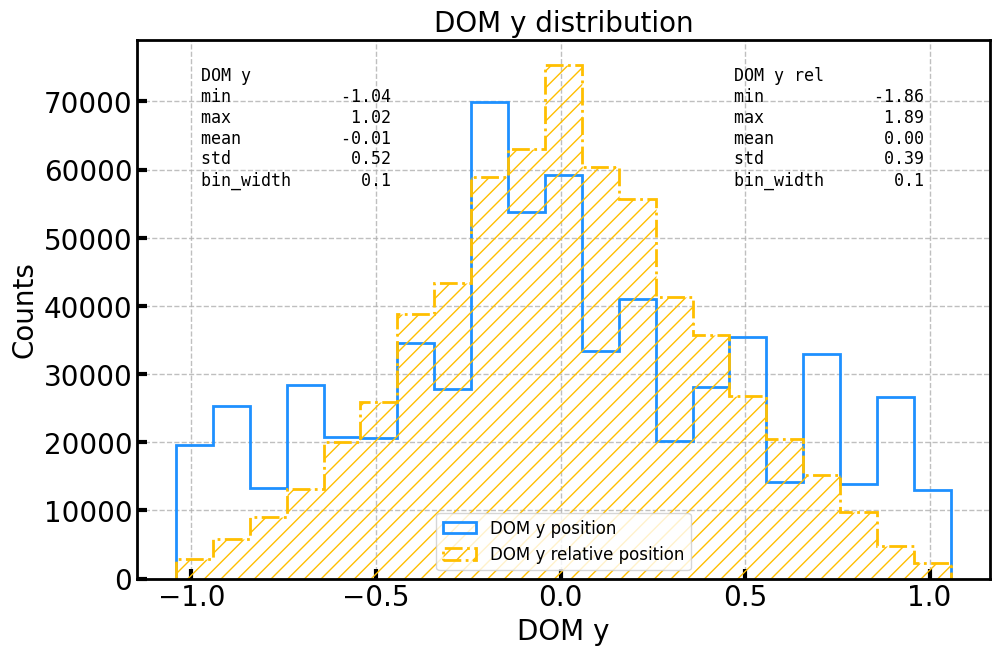

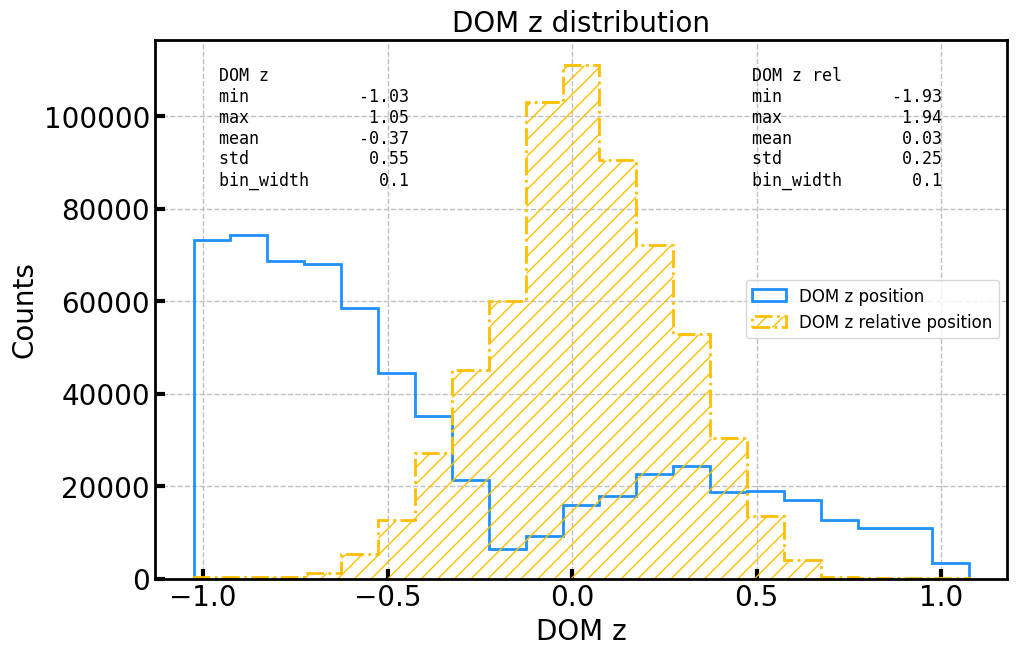

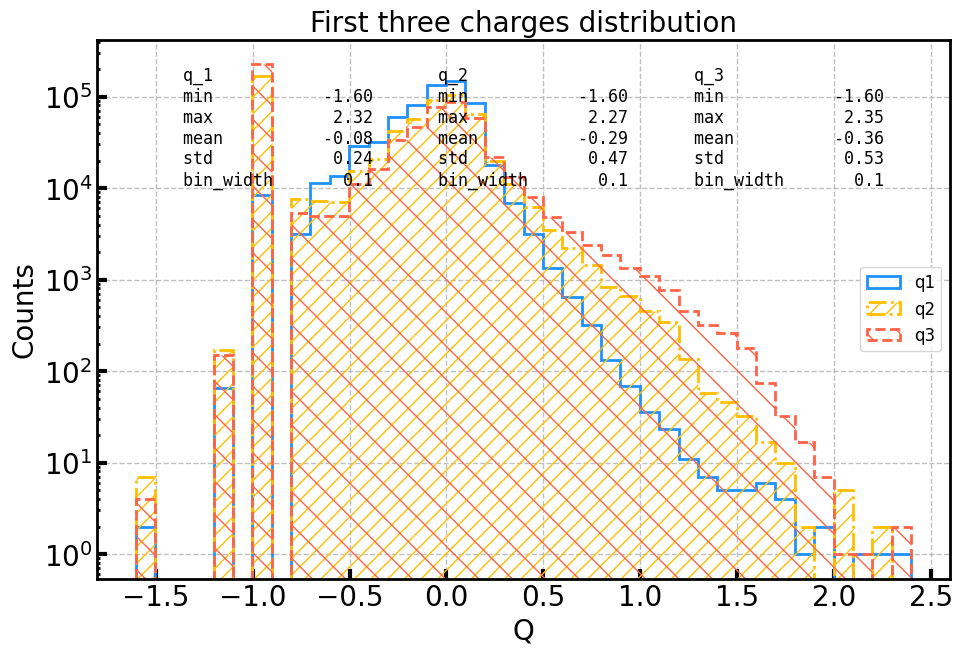

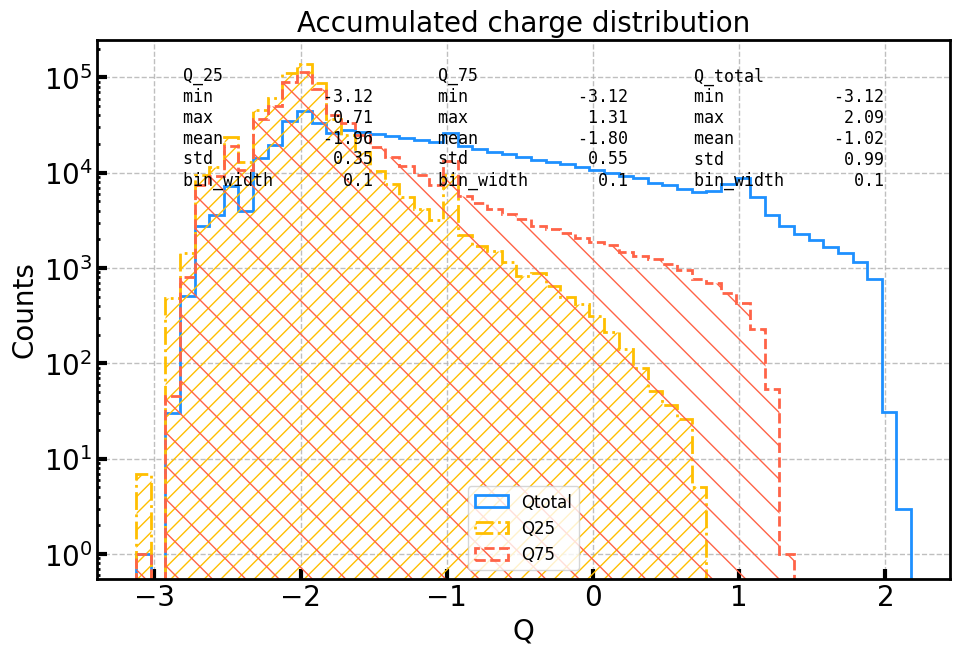

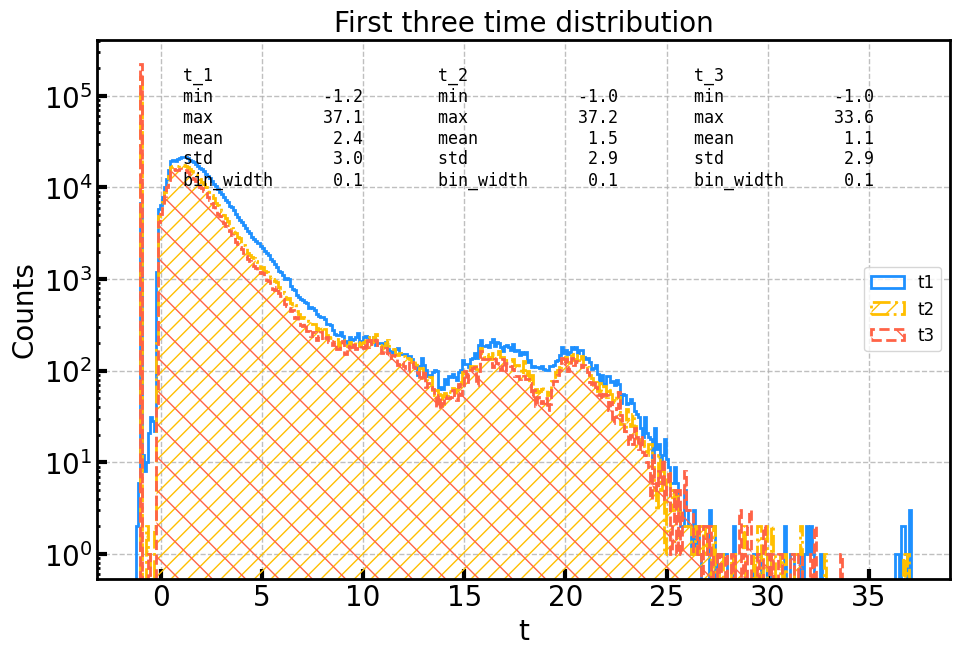

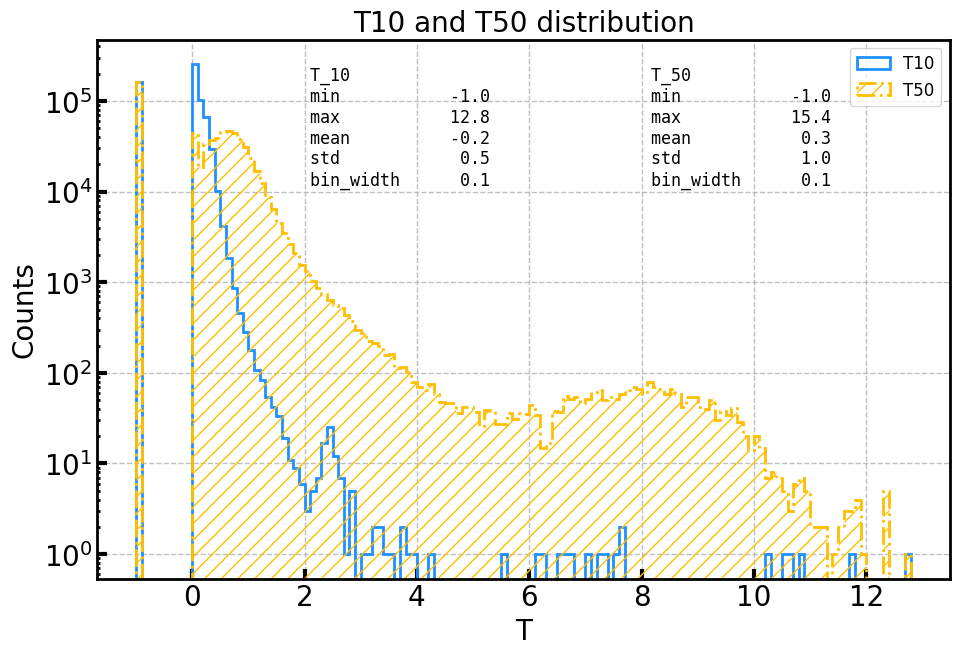

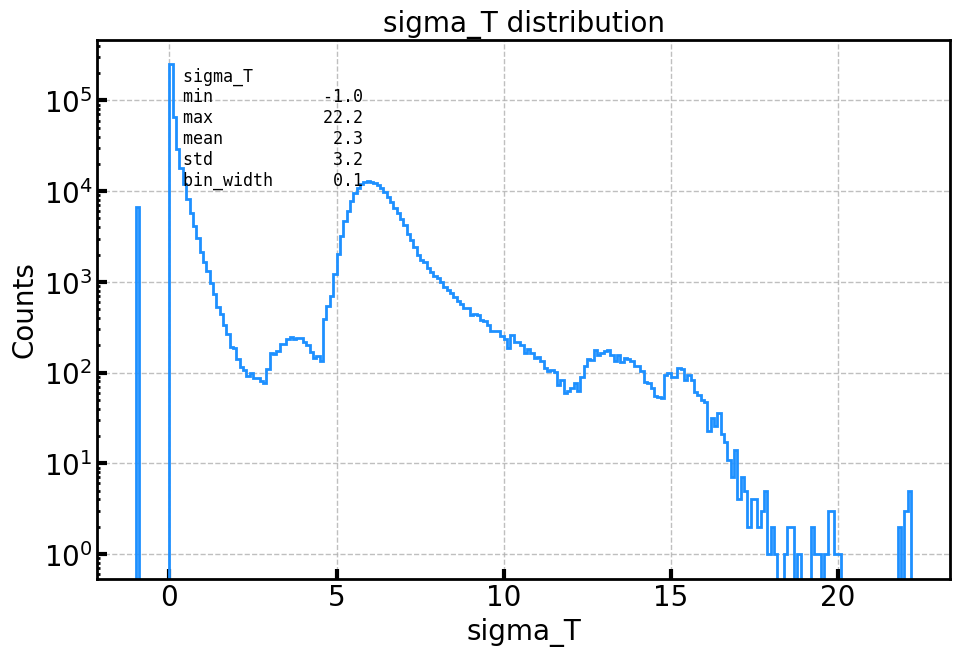

In [ ]:
plot_dom_position(df_pmt_22015_5_7_adv, "x", bin_width=0.1)
plot_dom_position(df_pmt_22015_5_7_adv, "y", bin_width=0.1)
plot_dom_position(df_pmt_22015_5_7_adv, "z", bin_width=0.1)
plot_q(df_pmt_22015_5_7_adv, bin_width=0.1)
plot_Q(df_pmt_22015_5_7_adv, bin_width=0.1)
plot_t(df_pmt_22015_5_7_adv, bin_width=0.1)
plot_T(df_pmt_22015_5_7_adv, bin_width=0.1)
plot_sigma_T(df_pmt_22015_5_7_adv, bin_width=0.1)
